# Loan Data

# 1. 데이터 준비 및 문제정의

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore') 
%matplotlib inline

data=pd.read_csv('Loan_payments_data.csv')
data.head()

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20166231,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,NaN,45,High School or Below,male
1,xqd20168902,PAIDOFF,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,NaN,50,Bechalor,female
2,xqd20160003,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,NaN,33,Bechalor,female
3,xqd20160004,PAIDOFF,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,NaN,27,college,male
4,xqd20160005,PAIDOFF,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,NaN,28,college,female


### 문제 정의 : 대출 고객이 기한내에 대출금을 상환할 것인가?


### Dataset의 column
Loan_ID	: 대출 고객의 ID

loan_status	: 상환 상태
- PAIDOFF : 기한 내에 대출금 모두 상환
- COLLECTION : 데이터수집 당시까지 미납(연체)
- COLLECTION_PAIDOFF : 기한은 지났지만 대출금 모두 상환

Principal : 고객이 대출받은 원금

terms : 고객에게 대출금 지급까지 걸린 기간

effective_date : 실제 계약 효과가 발휘하기 시작한 날짜

due_date : 대출금 납부 기한 날짜

paid_off_time : 고객이 은행에 모두 상환한 날짜, 시간

past_due_days :고객의 대출금 상환 연체 일 수

age : 고객의 나이

education : 고객의 학력
- High School or Below : 고졸
- college : 대졸
- Bechalor : 석사
- Master or Above : 박사 이상
            
Gender : 고객의 성별

# 2. 데이터 탐색 및 시각화

## Loan Status

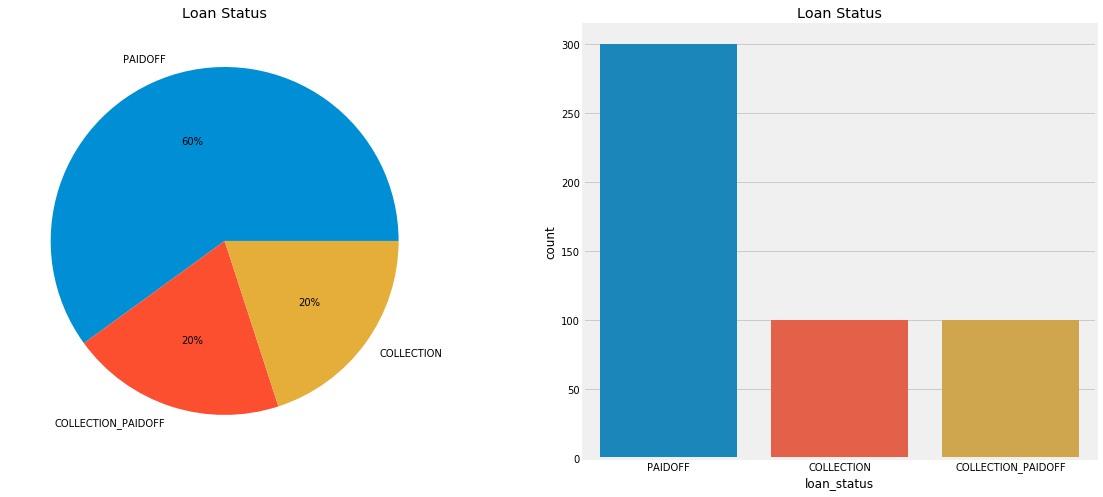

In [2]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['loan_status'].value_counts().plot.pie(autopct='%1.0f%%',ax=ax[0])
ax[0].set_title('Loan Status')
ax[0].set_ylabel('')
sns.countplot('loan_status',data=data,ax=ax[1])
ax[1].set_title('Loan Status')
plt.show()

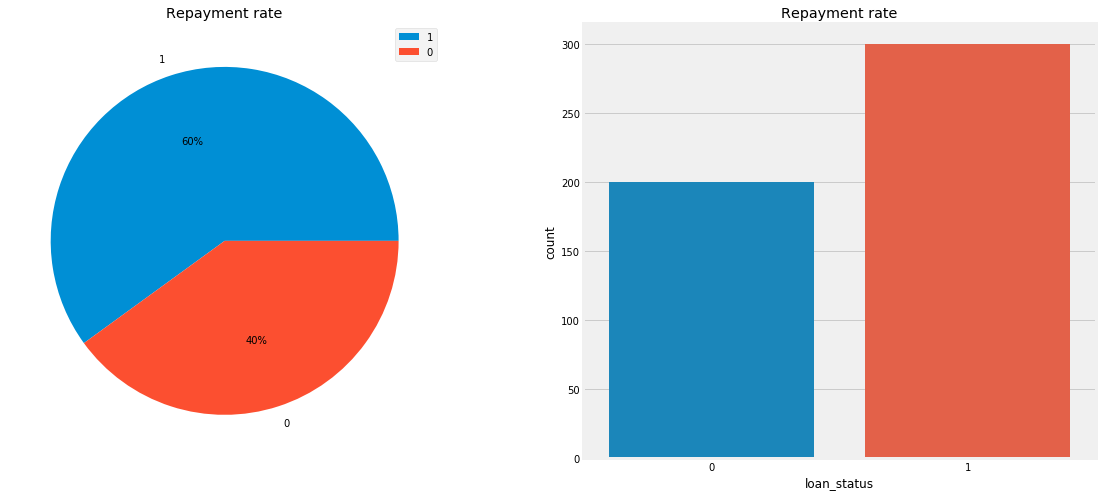

In [3]:
n_data = data.copy()
n_data['loan_status'] = (data['loan_status'] == 'PAIDOFF').astype(int)
f,ax=plt.subplots(1,2,figsize=(18,8))
n_data['loan_status'].value_counts().plot.pie(autopct='%1.0f%%',ax=ax[0])
ax[0].set_title('Repayment rate')
ax[0].set_ylabel('')
ax[0].legend()
sns.countplot('loan_status',data=n_data,ax=ax[1])
ax[1].set_title('Repayment rate')
plt.show()

기한 내에 대출금을 모두 상환한 고객(PAIDOFF)은 상환함(1)으로, 나머지는 상환하지 못함(0)으로 데이터 치환 후 상환율을 확인하였다.

500명중 300명의 고객이 대출금을 기한 내에 상환한 사실을 알 수 있다. (전체 대출 고객의 60%)

기한 내에 대출금을 모두 상환했는지의 여부가 중요하므로 데이터 전처리 과정에서 상환여부를 1과 0으로 나타낼 예정이다.

## Gender

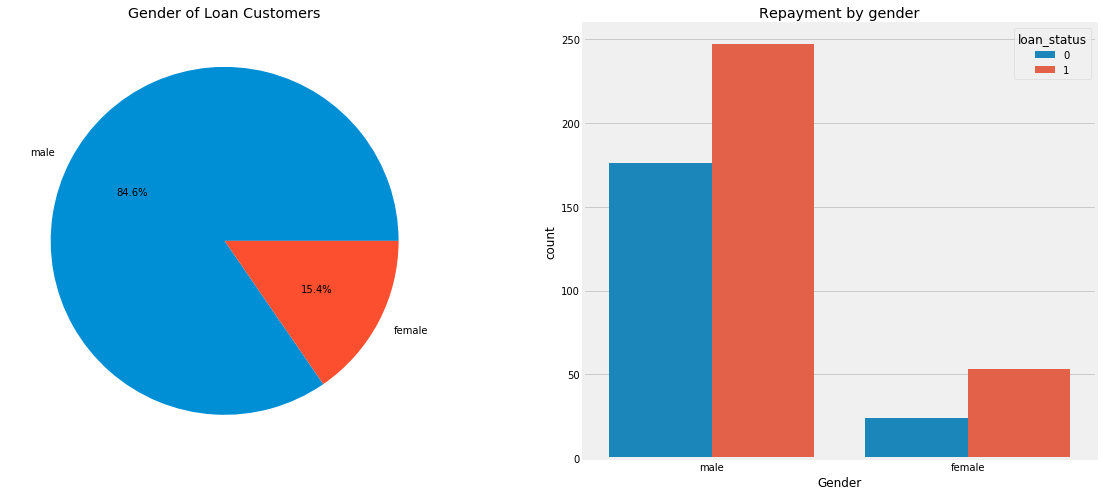

In [4]:
f,ax=plt.subplots(1,2,figsize=(18,8))
n_data['Gender'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0])
ax[0].set_title('Gender of Loan Customers')
ax[0].set_ylabel('')
sns.countplot('Gender',hue='loan_status',data=n_data,ax=ax[1])
ax[1].set_title('Repayment by gender')
plt.show()

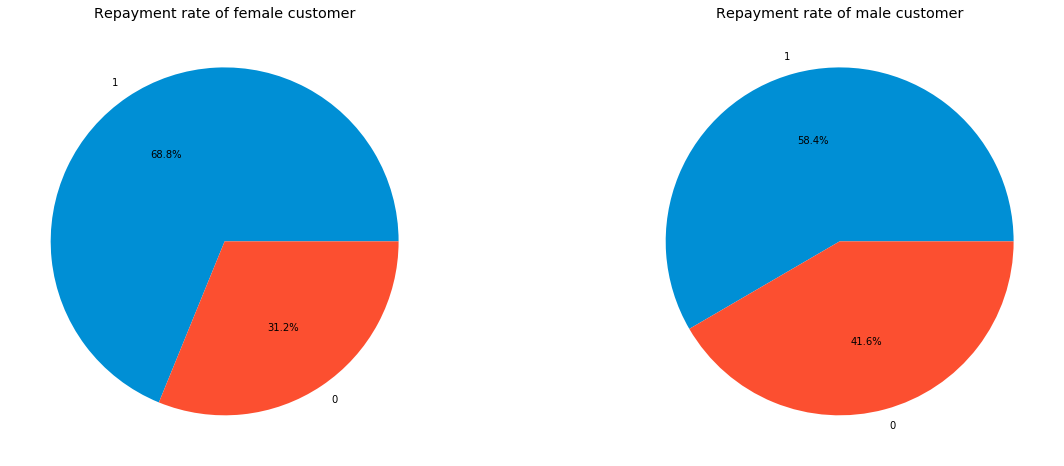

In [5]:
gender_group = list(n_data[['Gender','loan_status']].groupby(['Gender']))
#print(gender_group)
female_loan_status = gender_group[0][1]
male_loan_status = gender_group[1][1]
#print(female_loan_status)
#print(male_loan_status)

f,ax=plt.subplots(1,2,figsize=(18,8))
female_loan_status['loan_status'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0])
ax[0].set_title('Repayment rate of female customer')
ax[0].set_ylabel('')
male_loan_status['loan_status'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[1])
ax[1].set_title('Repayment rate of male customer')
ax[1].set_ylabel('')
plt.show()

전체 대출고객 중 남성고객이 84.6%로 여성고객 보다 3배 이상 많은 것을 확인할 수 있다.
또한 남성고객 여성고객 모두 기한내에 상한하는 고객들이 더 많은 것을 볼 수 있으며 그 중에서도 여성고객의 상환율이 더 높은 것을 확인할 수 있다.

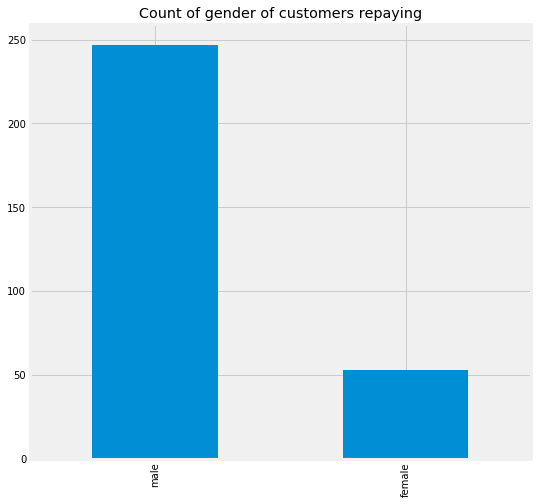

In [6]:
repaid_group = list(n_data[['Gender','loan_status']].groupby(['loan_status']))
repaid_gender = repaid_group[1][1]
#print(repaid_gender)

f,ax=plt.subplots(figsize=(8,8))
repaid_gender['Gender'].value_counts().plot.bar()
ax.set_title('Count of gender of customers repaying')
plt.show()

대출을 상환한 고객 중 대다수가 남성 고객이다. 전체 고객 중 남성 고객의 비율이 84.6%였던 것을 감안하면, 예상 가능한 결과이다.

## Principal

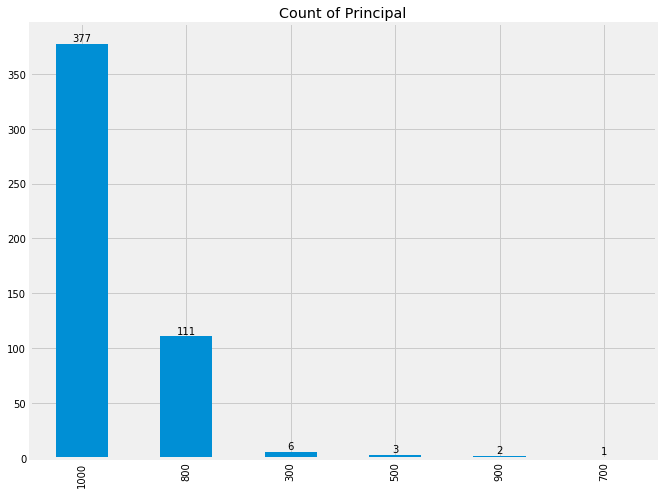

평균 대출금 : 943.2


loan_status,0,1,All
Principal,,,
300,0,6,6
500,1,2,3
700,0,1,1
800,42,69,111
900,0,2,2
1000,157,220,377
All,200,300,500


In [7]:
dic_principal = dict(data['Principal'].value_counts())
#print(dic_principal)
f,ax=plt.subplots(figsize=(10,8))
data['Principal'].value_counts().plot.bar()
ax.set_title('Count of Principal')
barlist = plt.gca().patches
for bar in barlist:
    left, bottom, width, height = bar.get_bbox().bounds
    plt.gca().annotate("%d"%height, xy=(left+width/2, height+5), ha='center', va='center',color='black')
plt.show()

print("평균 대출금 : "+str(data['Principal'].mean()))

pd.crosstab(n_data.Principal,n_data.loan_status,margins=True).style.background_gradient(cmap='YlGnBu')

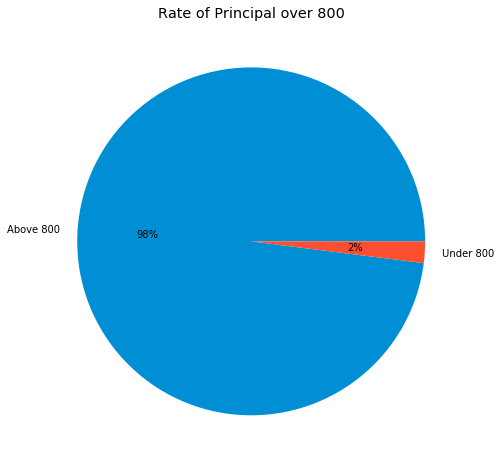

In [8]:
p_data = n_data.copy()
p_data.loc[n_data['Principal']>=800,"Principal"] = "Above 800"
p_data.loc[n_data['Principal']<800,"Principal"] = "Under 800"
f,ax=plt.subplots(figsize=(8,8))
p_data['Principal'].value_counts().plot.pie(autopct='%1.0f%%')
ax.set_title('Rate of Principal over 800')
ax.set_ylabel('')
plt.show()

고객들이 대출한 원금은 300,500,700,800,900,1000 으로 나눠지며 500명의 고객 중 377명의 고객이 1000을 대출한 것을 볼 수 있다.

800이상 대출한 고객과 800미만의 금액을 대출한 고객으로 구분하여 데이터를 치환한 후 대출금을 확인한 결과 98%의 고객이 800이상을 대출받고 있다는 사실을 확인할 수 있다.
또한 평균대출금이 943.2인것으로 보아 대출을 하는 대다수의 고객이 800이상의 금액을 대출을 하고 있다는 것을 알 수 있다.

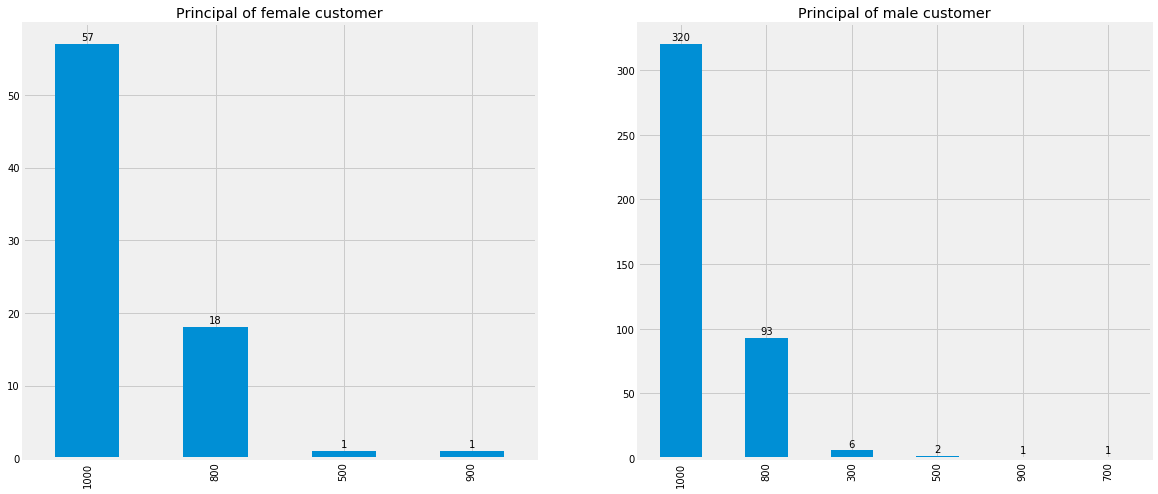

여성 평균 대출금 : 945.5
남성 평균 대출금 : 942.8


In [9]:
gender_group = list(n_data[['Gender','Principal']].groupby(['Gender']))
#print(gender_group)
female_Principal = gender_group[0][1]
male_Principal = gender_group[1][1]
#print(female_loan_status)
#print(male_loan_status)

f,ax=plt.subplots(1,2,figsize=(18,8))

female_Principal['Principal'].value_counts().plot.bar(ax=ax[0])
ax[0].set_title('Principal of female customer')
barlist = ax[0].patches
for bar in barlist:
    left, bottom, width, height = bar.get_bbox().bounds
    ax[0].annotate("%d"%height, xy=(left+width/2, height+1), ha='center', va='center',color='black')
    
male_Principal['Principal'].value_counts().plot.bar(ax=ax[1])
ax[1].set_title('Principal of male customer')
barlist = ax[1].patches
for bar in barlist:
    left, bottom, width, height = bar.get_bbox().bounds
    ax[1].annotate("%d"%height, xy=(left+width/2, height+5), ha='center', va='center',color='black')
plt.show()

print("여성 평균 대출금 : %1.1f"%female_Principal['Principal'].mean())
print("남성 평균 대출금 : %1.1f"%male_Principal['Principal'].mean())

남성과 여성의 대출금 빈도에서 비슷한 양상을 보이고 있고, 남성의 평균 대출금과 여성의 평균 대출금, 그리고 전체 고객의 평균 대출금이 비슷한 수준인 것을 보아 성별과 대출금 사이의 상관관계는 없어보인다.

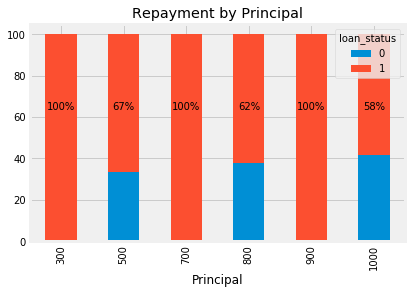

In [10]:
ct = pd.crosstab(n_data.Principal,n_data.loan_status)
rct = ct.div(ct.sum(axis=1), axis=0)*100
rct.plot.bar(stacked=True)
plt.title('Repayment by Principal')

barlist = plt.gca().patches
n = int(len(barlist)/2)
for i in range(0,n):
    left, bottom, width, height = barlist[i].get_bbox().bounds
    plt.gca().annotate("%1.0f%%"%(100-height), xy=(left+width/2,65), ha='center', va='center',color='black')

상대적으로 높은 금액을 대출한 고객의 상환율이 낮은것을 확인할 수 있다.

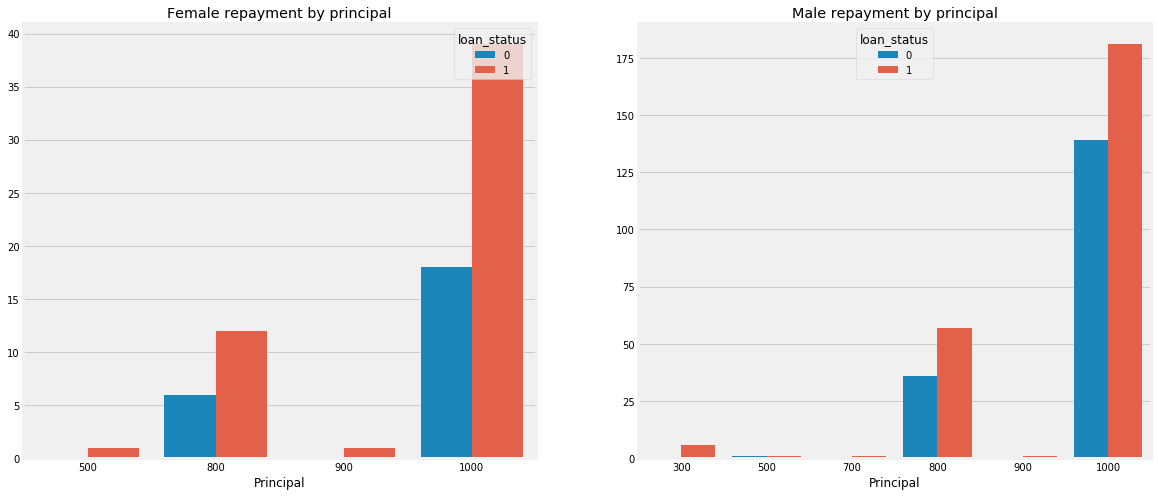

In [11]:
gender_group = list(n_data[['Gender','loan_status','Principal']].groupby(['Gender']))
#print(gender_group)
female_principal = gender_group[0][1]
male_principal = gender_group[1][1]
#print(female_loan_status)
#print(male_loan_status)

f,ax=plt.subplots(1,2,figsize=(18,8))
sns.countplot('Principal',hue='loan_status',data=female_principal,ax=ax[0])
ax[0].set_title('Female repayment by principal')
ax[0].set_ylabel('')

sns.countplot('Principal',hue='loan_status',data=male_principal,ax=ax[1])
ax[1].set_title('Male repayment by principal')
ax[1].set_ylabel('')
plt.show()

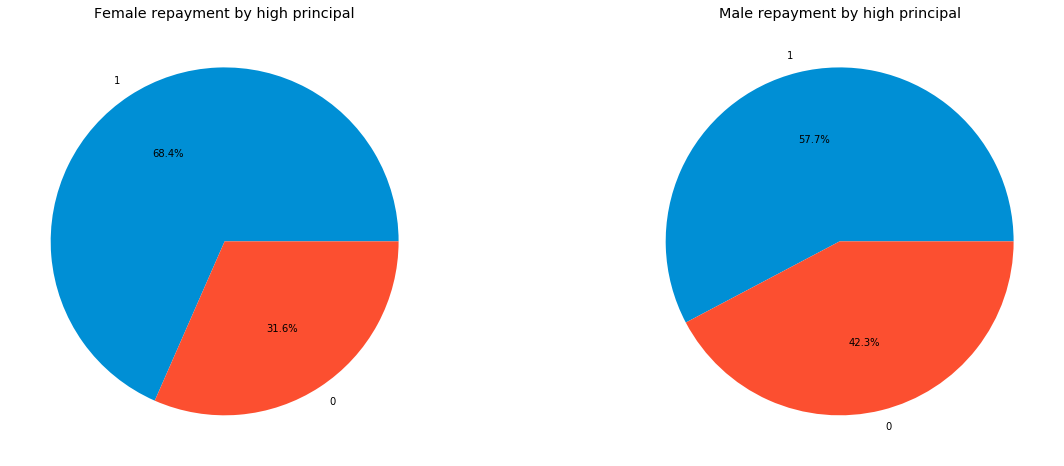

In [12]:
gender_group = list(p_data[['Gender','loan_status','Principal']].groupby(['Gender','Principal']))
#print(gender_group)
female_principal = gender_group[0][1]
male_principal = gender_group[2][1]
#print(female_loan_status)
#print(male_loan_status)

f,ax=plt.subplots(1,2,figsize=(18,8))
female_principal['loan_status'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0])
ax[0].set_title('Female repayment by high principal')
ax[0].set_ylabel('')

male_principal['loan_status'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[1])
ax[1].set_title('Male repayment by high principal')
ax[1].set_ylabel('')
plt.show()

여성과 남성 모두 상대적으로 대출 금액이 클 수록 상환율이 낮으며 800이상의 고액 대출에 있어서 여성의 상환율이 좀 더 높은 것을 확인할 수 있다.

## Education

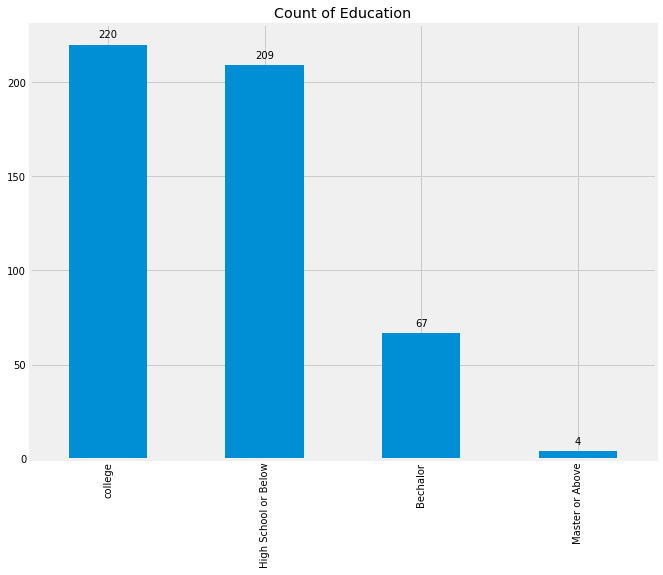

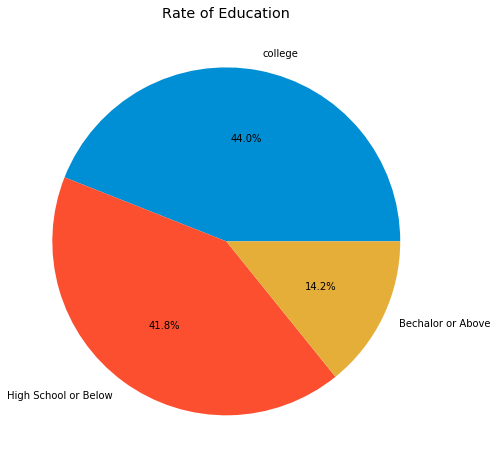

In [13]:
f,ax=plt.subplots(figsize=(10,8))
data['education'].value_counts().plot.bar()
ax.set_title('Count of Education')
barlist = plt.gca().patches
for bar in barlist:
    left, bottom, width, height = bar.get_bbox().bounds
    plt.gca().annotate("%d"%height, xy=(left+width/2, height+5), ha='center', va='center',color='black')
plt.show()

e_data = n_data.copy()
e_data.loc[e_data['education'] == "Bechalor","education"] = "Bechalor or Above"
e_data.loc[e_data['education'] == "Master or Above","education"] = "Bechalor or Above"

f,ax=plt.subplots(figsize=(8,8))
e_data['education'].value_counts().plot.pie(autopct='%1.1f%%')
ax.set_title('Rate of Education')
ax.set_ylabel('')
plt.show()

pd.crosstab([n_data.Gender,n_data.loan_status],n_data.education,margins=True).style.background_gradient(cmap='YlGnBu')

고졸 이하 혹은 대졸자가 대다수이며, 석사와 박사를 하나의 범주로 묶어서 확인하였을 때에도 대출 고객 중 고졸 이하와 대졸자가 대다수인것을 확인할 수 있다.

박사 이상인 고객의 수가 상대적으로 매우 적어 데이터 전처리 과정에서 석사와 박사이상을 통합하여 진행할 예정이다.

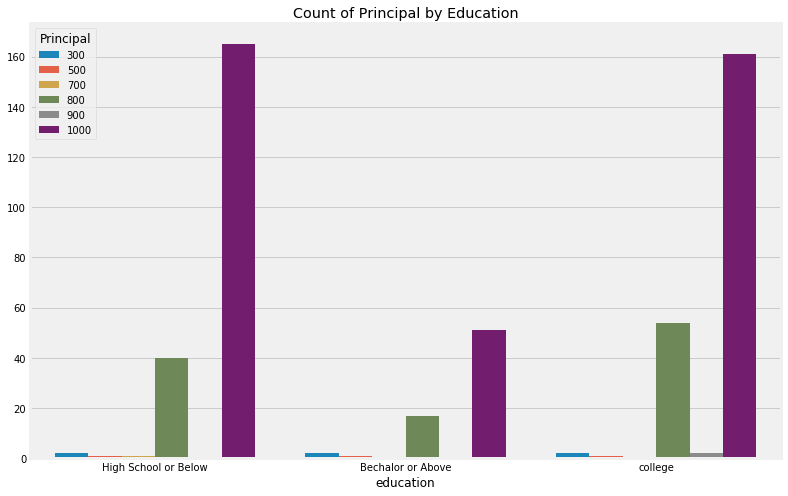

In [14]:
f,ax=plt.subplots(figsize=(12,8))
sns.countplot('education',hue='Principal',data=e_data)
ax.set_title('Count of Principal by Education')
ax.set_ylabel('')
plt.show()

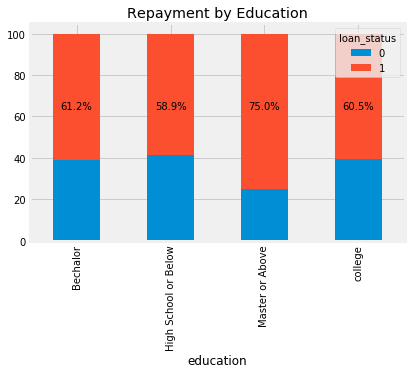

In [15]:
ct = pd.crosstab(n_data.education,n_data.loan_status)
rct = ct.div(ct.sum(axis=1), axis=0)*100
rct.plot.bar(stacked=True)
plt.title('Repayment by Education')

barlist = plt.gca().patches
n = int(len(barlist)/2)
for i in range(0,n):
    left, bottom, width, height = barlist[i].get_bbox().bounds
    plt.gca().annotate("%1.1f%%"%(100-height), xy=(left+width/2, 65), ha='center', va='center',color='black')
plt.show()

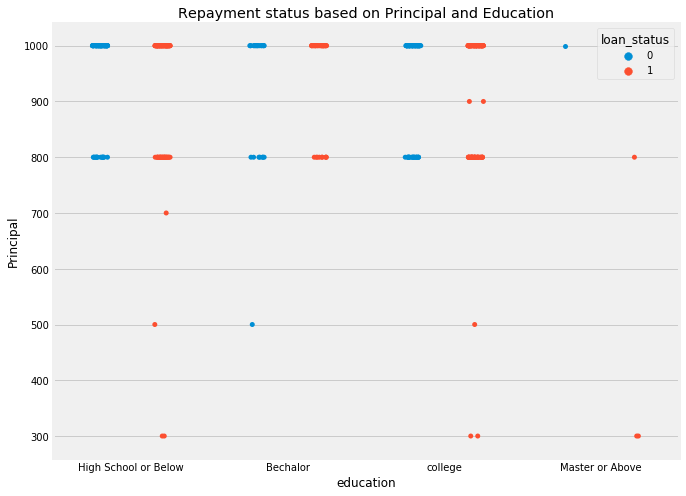

In [16]:
f,ax=plt.subplots(figsize=(10,8))
ax.set_title("Repayment status based on Principal and Education")
sns.stripplot(x='education', y='Principal', hue='loan_status', data=n_data, jitter=True, dodge=True)
plt.show()

모든 학력수준에 있어서 대출금의 액수는 800이상이 대다수이고 교육 수준이 높을수록 상환율이 조금씩 높아지는 것을 볼 수 있지만 대체로 비슷한 것을 확인할 수 있다.

## Age

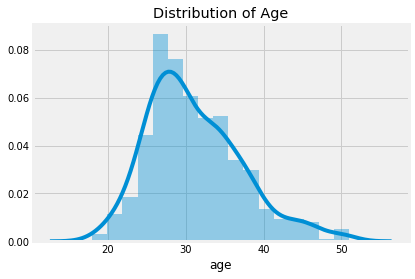

In [17]:
sns.distplot(data.age)
plt.title('Distribution of Age')
plt.show()

20대 30대에 고객이 많이 분포하는 것을 확인할 수 있다

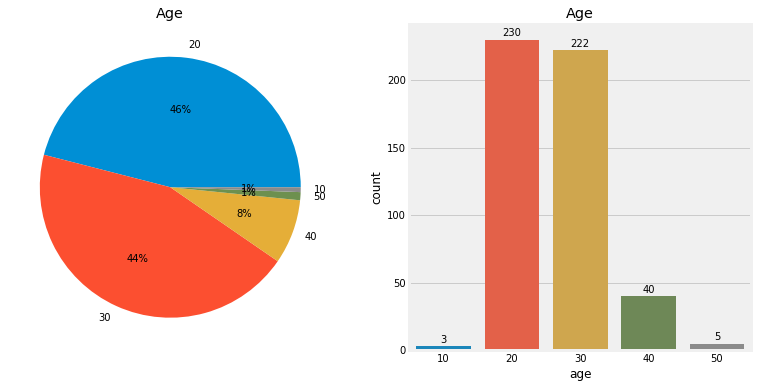

In [18]:
a_data = n_data.copy()
a_data.age = (n_data.age//10)*10

f,ax=plt.subplots(1,2,figsize=(12,6))
a_data['age'].value_counts().plot.pie(autopct='%1.0f%%',ax=ax[0])
ax[0].set_title('Age')
ax[0].set_ylabel('')
sns.countplot('age',data=a_data,ax=ax[1])
ax[1].set_title('Age')

barlist = ax[1].patches
for bar in barlist:
    left, bottom, width, height = bar.get_bbox().bounds
    ax[1].annotate("%d"%height, xy=(left+width/2, height+5), ha='center', va='center',color='black')
plt.show()

나이를 10단위로 범주화 하여 다시 한번 확인하였다. 고객의 90%가 20,30대 인것을 확인할 수 있다.

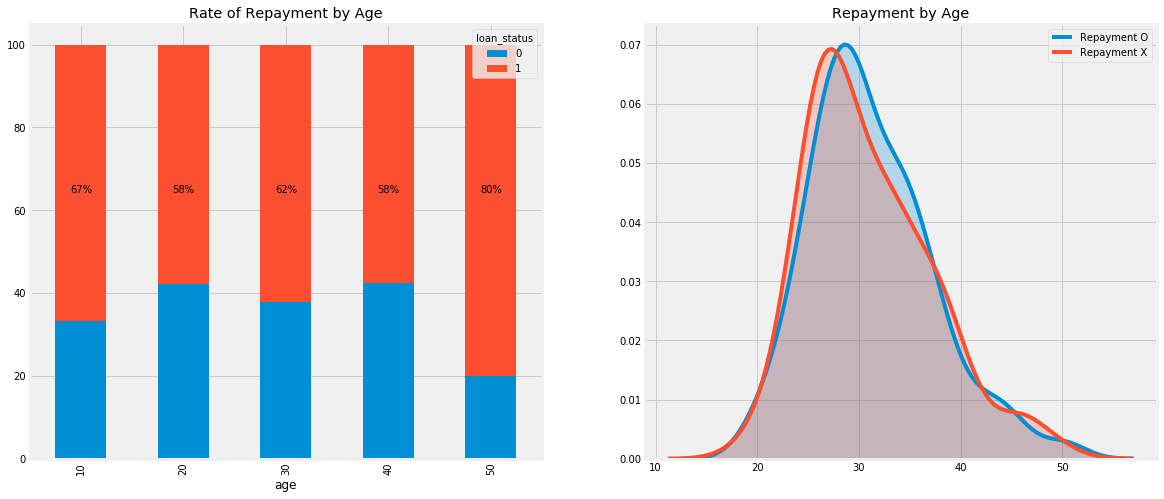

loan_status,0,1,All
age,,,
10,1,2,3
20,97,133,230
30,84,138,222
40,17,23,40
50,1,4,5
All,200,300,500


In [19]:
f,ax=plt.subplots(1,2,figsize=(18,8))
ct = pd.crosstab(a_data.age,a_data.loan_status)
rct = ct.div(ct.sum(axis=1), axis=0)*100
rct.plot.bar(stacked=True,ax=ax[0])
ax[0].set_title('Rate of Repayment by Age')
barlist = ax[0].patches
n = int(len(barlist)/2)
for i in range(0,n):
    left, bottom, width, height = barlist[i].get_bbox().bounds
    ax[0].annotate("%1.0f%%"%(100-height), xy=(left+width/2,65), ha='center', va='center',color='black')

sns.kdeplot(n_data[n_data['loan_status']==1].age,shade=True)
sns.kdeplot(n_data[n_data['loan_status']==0].age,shade=True)
ax[1].set_title('Repayment by Age')
ax[1].legend(['Repayment O','Repayment X'])
plt.show()

pd.crosstab(a_data.age,a_data.loan_status,margins=True).style.background_gradient(cmap='YlGnBu')

연령대별 상환율을 10단위로 범주화한 연령대로 확인했을 때 큰 상관이 없어보이나 20대와 30대가 전체 고객의 90%인것을 감안하면 나이가 많을수록 상환율이 높다는 것을 짐작할 수 있다.

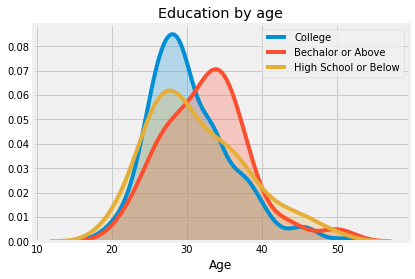

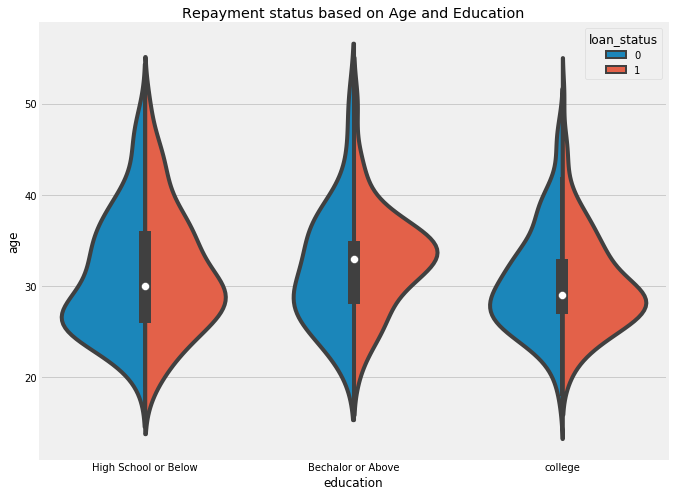

In [20]:
fig = sns.kdeplot(e_data[e_data['education']=='college'].age,shade=True)
sns.kdeplot(e_data[e_data['education']=='Bechalor or Above'].age,shade=True)
sns.kdeplot(e_data[e_data['education']=='High School or Below'].age,shade=True)
fig.set_xlabel('Age')
plt.legend(['College','Bechalor or Above','High School or Below'])
plt.title("Education by age")

f,ax=plt.subplots(figsize=(10,8))
ax.set_title("Repayment status based on Age and Education")
sns.violinplot(x='education', y='age', hue='loan_status', data=e_data, split=True)
plt.show()

대출고객의 각 학력에 있어서 나이가 많을수록 학력이 높은 것을 확인할 수 있으나 대체로 나이의 분포가 비슷한 것으로 보아 학력과 나이간의 상관관계는 없어보인다.

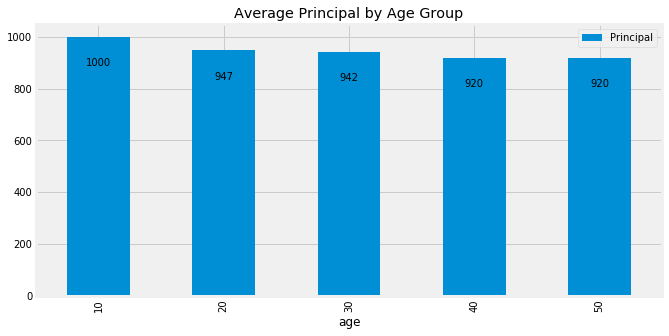

In [21]:
f,ax = plt.subplots(figsize=(10,5))
a_data[['age','Principal']].groupby(['age']).mean().plot.bar(ax=ax)
ax.set_title('Average Principal by Age Group')

barlist = ax.patches
for bar in barlist:
    left, bottom, width, height = bar.get_bbox().bounds
    ax.annotate("%d"%height, xy=(left+width/2, height-100), ha='center', va='center',color='black')
plt.show()

모든 연령대의 고객이 평균 900이상의 고액 대출을 받고 있다. 
연령대가 높아질수록 대출금액이 줄어드는 것을 확인할 수 있다.

## Term

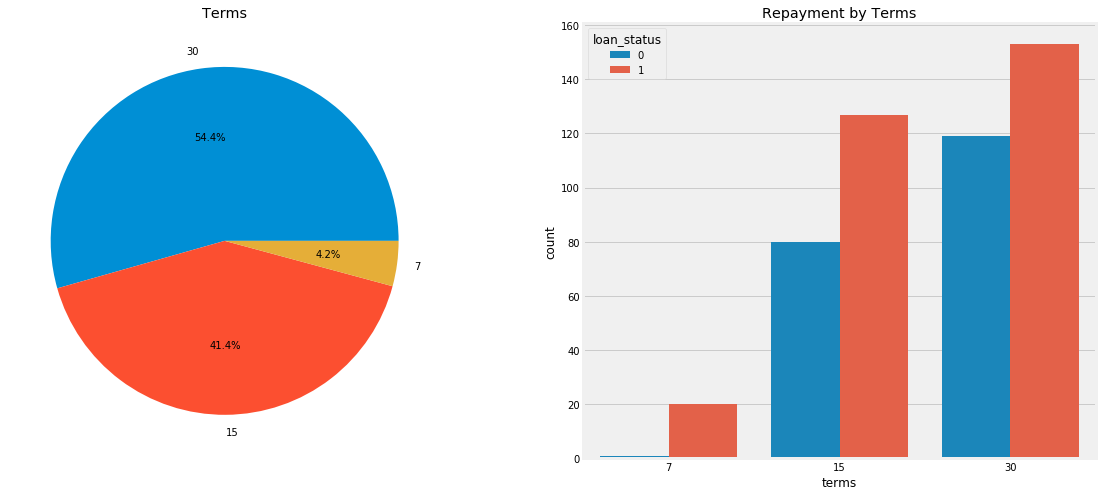

In [22]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['terms'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0])
ax[0].set_title('Terms')
ax[0].set_ylabel('')
sns.countplot('terms',hue='loan_status',data=n_data,ax=ax[1])
ax[1].set_title('Repayment by Terms')
plt.show()

대출금 지급에 걸리는 기간은 7일, 15일, 30일 중 하나이며 30일이 걸리는 경우가 제일 많은 것을 확인할 수 있다. 

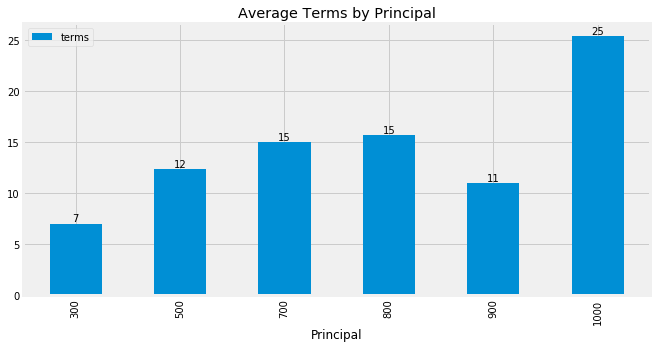

In [23]:
f,ax = plt.subplots(figsize=(10,5))
data[['Principal','terms']].groupby(['Principal']).mean().plot.bar(ax=ax)
ax.set_title('Average Terms by Principal')

barlist = ax.patches
for bar in barlist:
    left, bottom, width, height = bar.get_bbox().bounds
    ax.annotate("%d"%height, xy=(left+width/2, height+0.5), ha='center', va='center',color='black')
plt.show()

주로 대출하는 금액이 클수록 대출금 지급에 걸리는 기간이 긴 것을 확인할 수 있다.

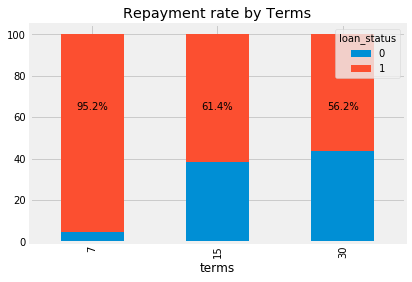

In [24]:
ct = pd.crosstab(n_data.terms,n_data.loan_status)
rct = ct.div(ct.sum(axis=1), axis=0)*100
rct.plot.bar(stacked=True)
plt.title('Repayment rate by Terms')

barlist = plt.gca().patches
n = int(len(barlist)/2)
for i in range(0,n):
    left, bottom, width, height = barlist[i].get_bbox().bounds
    plt.gca().annotate("%1.1f%%"%(100-height), xy=(left+width/2, 65), ha='center', va='center',color='black')

대출금 지급에 걸리는 기간이 짧을수록 상환율이 높은 것을 볼 수 있다.

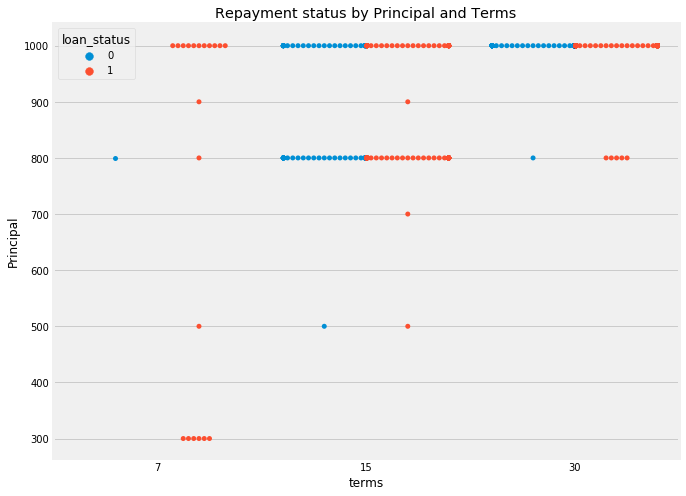

In [25]:
f,ax = plt.subplots(figsize=(10,8))
sns.swarmplot(x='terms', y='Principal', hue='loan_status', data=n_data, split=True)
plt.title('Repayment status by Principal and Terms')
plt.show()

위에서 대출금 지급에 걸리는 기간이 상환율과도 관계가 있어보이고 대출금과도 관계가 있어보이는 것을 확인하였기 때문에 대출금 지급에 걸리는 기간, 대출금, 상환여부 세가지 사이의 관계를 확인해보았다.

대출금 지급에 걸리는 기간이 짧고 대출금액이 작을수록 주로 기한내에 상환하는 고객들이 분포하고 대출금 지급에 걸리는 기간이 길고 대출금액이 클수록 기한내에 상환하지 못하는 고객들이 주로 분포하는 것을 확인할 수 있다 

## Effective date

In [26]:
set(data['effective_date'])

{'9/10/2016',
 '9/11/2016',
 '9/12/2016',
 '9/13/2016',
 '9/14/2016',
 '9/8/2016',
 '9/9/2016'}

2016년 9월 8일(목요일)부터 2016년 9월 14일(수요일)까지 7일이 존재하는 것을 볼 수 있다.

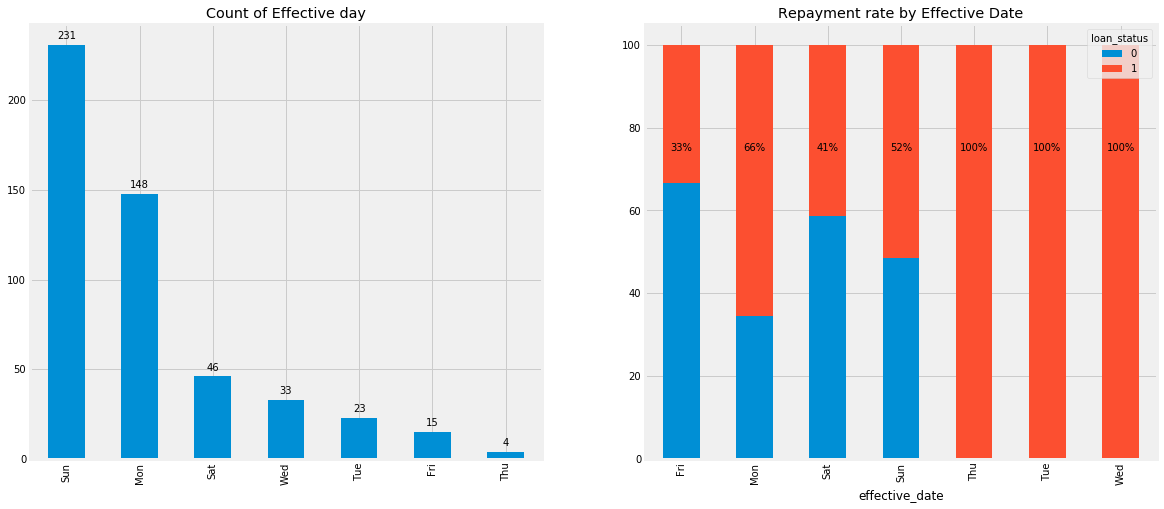

In [27]:
ed_data = n_data.copy()
ed_data.loc[data['effective_date'] == '9/8/2016','effective_date'] = 'Thu'
ed_data.loc[data['effective_date'] == '9/9/2016','effective_date'] = 'Fri'
ed_data.loc[data['effective_date'] == '9/10/2016','effective_date'] = 'Sat'
ed_data.loc[data['effective_date'] == '9/11/2016','effective_date'] = 'Sun'
ed_data.loc[data['effective_date'] == '9/12/2016','effective_date'] = 'Mon'
ed_data.loc[data['effective_date'] == '9/13/2016','effective_date'] = 'Tue'
ed_data.loc[data['effective_date'] == '9/14/2016','effective_date'] = 'Wed'

f,ax=plt.subplots(1,2,figsize=(18,8))
ed_data['effective_date'].value_counts().plot.bar(ax=ax[0])
ax[0].set_title('Count of Effective day')
barlist = ax[0].patches
for bar in barlist:
    left, bottom, width, height = bar.get_bbox().bounds
    ax[0].annotate("%d"%height, xy=(left+width/2, height+5), ha='center', va='center',color='black')

ct = pd.crosstab(ed_data.effective_date,ed_data.loan_status)
rct = ct.div(ct.sum(axis=1), axis=0)*100
rct.plot.bar(stacked=True,ax=ax[1])
ax[1].set_title('Repayment rate by Effective Date')

barlist = ax[1].patches
n = int(len(barlist)/2)
for i in range(0,n):
    left, bottom, width, height = barlist[i].get_bbox().bounds
    ax[1].annotate("%1.0f%%"%(100-height), xy=(left+width/2,75), ha='center', va='center',color='black')

실제 계약 효과가 발휘한 날짜를 요일로 바꾸어서 확인한 결과 일요일에 대출한 고객이 가장 많고 금,토,일요일의 상환율이 낮고, 화,수,목요일의 상환율이 높은 것으로 보아 주말일수록 상환율이 나고 평일일수록 상환율이 높다는 것을 확인할 수 있다. 

날짜 데이터의 수가 7개로 적은 편이고 요일에서 특징이 있으므로 데이터 전처리 과정에서 날짜를 해당하는 요일로 변경할 예정이다.

# 3. 데이터 전처리

In [28]:
data=pd.read_csv('Loan_payments_data.csv')
#3가지 상태였던 loan_status를 상환함(1),상환하지 않음(0)의 두가지 경우로 변경
data['loan_status'] = (data['loan_status'] == 'PAIDOFF').astype(int)
data = data.rename({'loan_status':'Repayment'},axis=1)
#학력에 있어서 석사와 박사이상을 하나의 범주로 통합 후 변경
#(High School or Below : 0, college : 1, Bechalor or Above : 2)
data.loc[data['education'] == "High School or Below","education"] = 0
data.loc[data['education'] == "college","education"] = 1
data.loc[data['education'] == "Bechalor","education"] = 2
data.loc[data['education'] == "Master or Above","education"] = 2
#효력이 발생한 날짜를 요일로 변경 (Mon : 0 ~ Sun : 6)
data.loc[data['effective_date'] == '9/8/2016','effective_date'] = 3
data.loc[data['effective_date'] == '9/9/2016','effective_date'] = 4
data.loc[data['effective_date'] == '9/10/2016','effective_date'] = 5
data.loc[data['effective_date'] == '9/11/2016','effective_date'] = 6
data.loc[data['effective_date'] == '9/12/2016','effective_date'] = 0
data.loc[data['effective_date'] == '9/13/2016','effective_date'] = 1
data.loc[data['effective_date'] == '9/14/2016','effective_date'] = 2
data = data.rename({'effective_date':'effective_day'},axis=1)
#성별을 male : 0 , female : 1 로 변경
data.loc[data['Gender'] == 'male','Gender'] = 0
data.loc[data['Gender'] == 'female','Gender'] = 1
data.head()

,Loan_ID,Repayment,Principal,terms,effective_day,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20166231,1,1000,30,3,10/7/2016,9/14/2016 19:31,NaN,45,0,0
1,xqd20168902,1,1000,30,3,10/7/2016,10/7/2016 9:00,NaN,50,2,1
2,xqd20160003,1,1000,30,3,10/7/2016,9/25/2016 16:58,NaN,33,2,1
3,xqd20160004,1,1000,15,3,9/22/2016,9/22/2016 20:00,NaN,27,1,0
4,xqd20160005,1,1000,30,4,10/8/2016,9/23/2016 21:36,NaN,28,1,1


In [29]:
data.isnull().any()

Loan_ID          False
Repayment        False
Principal        False
terms            False
effective_day    False
due_date         False
paid_off_time     True
past_due_days     True
age              False
education        False
Gender           False
dtype: bool

# 4. 트레이닝 모델

[0.608, 0.6, 0.584, 0.608, 0.64]


<BarContainer object of 5 artists>

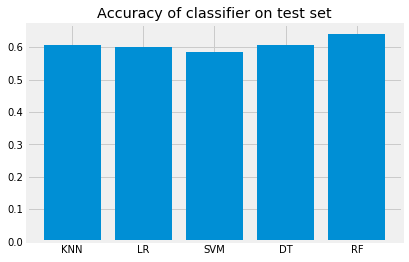

In [30]:
from sklearn.model_selection import train_test_split

X = data[['Principal','terms','effective_day','age','education','Gender']]
y = data['Repayment']
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)

models = ['KNN','LR','SVM','DT','RF']
scores = [] 

#K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
clf =  KNeighborsClassifier(n_neighbors=7).fit(X_train,y_train)
scores.append(clf.score(X_test,y_test))

#Logistic Regression
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression().fit(X_train,y_train)
scores.append(clf.score(X_test,y_test))

#Support Vector Machine
from sklearn.svm import SVC
clf = SVC(kernel='linear').fit(X_train,y_train)
scores.append(clf.score(X_test,y_test))

#Decision Tree
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(X_train,y_train)
scores.append(clf.score(X_test,y_test))

#Random Forest
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=5,random_state=2).fit(X_train,y_train)
scores.append(clf.score(X_test,y_test))

print(scores)
plt.figure()
plt.title('Accuracy of classifier on test set')
plt.bar(models,scores)

Random Forest Classifier의 정확도가 가장 높은 것을 확인할 수 있다.

In [31]:
#대출한 원금(Principal)이 500 , 대출금 지급에 걸린 기간(terms)이 15일,
#효력이 발생한 요일(effective_day)이 목요일(3), 나이(age)가 31세, 
#최종학력(education)이 대학졸업(1), 성별(Gender)이 여성(1)인 고객의 상환 여부를 추정
clf = RandomForestClassifier(n_estimators=5,random_state=2).fit(X_train,y_train)
repayment_prediction = clf.predict([[500,15,3,31,1,1]])
if repayment_prediction[0] == 1:
    print("상환할 것입니다.")
else:
    print("상환하지 않을 것입니다.")

상환할 것입니다.
